1.Mounted at '/content/drive'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imported required libraries **

In [2]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import matplotlib.dates as mdates

2.Reading the Irish hourly data csv file.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/hourly-data-Dublin.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,Galway,ATHENRY,53.289,-8.786,26-jun-2011 01:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
1,Galway,ATHENRY,53.289,-8.786,26-jun-2011 02:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2,Galway,ATHENRY,53.289,-8.786,26-jun-2011 03:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
3,Galway,ATHENRY,53.289,-8.786,26-jun-2011 04:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
4,Galway,ATHENRY,53.289,-8.786,26-jun-2011 05:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   county     object 
 1   station    object 
 2   latitude   float64
 3   longitude  float64
 4   date       object 
 5   rain       object 
 6   temp       object 
 7   wetb       object 
 8   dewpt      object 
 9   vappr      object 
 10  rhum       object 
 11  msl        object 
 12  wdsp       object 
 13  wddir      object 
 14  sun        object 
 15  vis        object 
 16  clht       object 
 17  clamt      object 
dtypes: float64(2), object(16)
memory usage: 640.0+ MB


In [6]:
df.describe()

,latitude,longitude
count,4.660423e+06,4.660423e+06
mean,5.325453e+01,-8.181232e+00
std,9.898850e-01,1.220681e+00
min,5.147600e+01,-1.024100e+01
25%,5.229800e+01,-8.993000e+00
50%,5.342800e+01,-8.244000e+00
75%,5.390600e+01,-7.310000e+00
max,5.537200e+01,-6.241000e+00


In [7]:
df.isna().sum() / len(df)

county       0.000000
station      0.000000
latitude     0.000000
longitude    0.000000
date         0.000000
rain         0.000000
temp         0.000000
wetb         0.000000
dewpt        0.000000
vappr        0.000000
rhum         0.000000
msl          0.000000
wdsp         0.049144
wddir        0.049144
sun          0.554707
vis          0.554707
clht         0.554707
clamt        0.554707
dtype: float64

3. Split the date time format into day, month and year.

In [8]:
df[['date','timestamp']] = df['date'].str.split(' ',expand=True)
df[['day','month','year']] = df['date'].str.split('-',expand=True)
df['hour'] = df['timestamp'].str[0:2]

In [9]:
df.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt,timestamp,day,month,year,hour
0,Galway,ATHENRY,53.289,-8.786,26-jun-2011,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN,01:00,26,jun,2011,01
1,Galway,ATHENRY,53.289,-8.786,26-jun-2011,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN,02:00,26,jun,2011,02
2,Galway,ATHENRY,53.289,-8.786,26-jun-2011,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN,03:00,26,jun,2011,03
3,Galway,ATHENRY,53.289,-8.786,26-jun-2011,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN,04:00,26,jun,2011,04
4,Galway,ATHENRY,53.289,-8.786,26-jun-2011,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN,05:00,26,jun,2011,05


In [10]:
df.drop('date', axis=1, inplace=True)

In [11]:
df.count()

county       4660423
station      4660423
latitude     4660423
longitude    4660423
rain         4660423
temp         4660423
wetb         4660423
dewpt        4660423
vappr        4660423
rhum         4660423
msl          4660423
wdsp         4431391
wddir        4431391
sun          2075256
vis          2075256
clht         2075256
clamt        2075256
timestamp    4660423
day          4660423
month        4660423
year         4660423
hour         4660423
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 22 columns):
 #   Column     Dtype  
---  ------     -----  
 0   county     object 
 1   station    object 
 2   latitude   float64
 3   longitude  float64
 4   rain       object 
 5   temp       object 
 6   wetb       object 
 7   dewpt      object 
 8   vappr      object 
 9   rhum       object 
 10  msl        object 
 11  wdsp       object 
 12  wddir      object 
 13  sun        object 
 14  vis        object 
 15  clht       object 
 16  clamt      object 
 17  timestamp  object 
 18  day        object 
 19  month      object 
 20  year       object 
 21  hour       object 
dtypes: float64(2), object(20)
memory usage: 782.2+ MB


In [13]:
df.isna().sum() / len(df)

county       0.000000
station      0.000000
latitude     0.000000
longitude    0.000000
rain         0.000000
temp         0.000000
wetb         0.000000
dewpt        0.000000
vappr        0.000000
rhum         0.000000
msl          0.000000
wdsp         0.049144
wddir        0.049144
sun          0.554707
vis          0.554707
clht         0.554707
clamt        0.554707
timestamp    0.000000
day          0.000000
month        0.000000
year         0.000000
hour         0.000000
dtype: float64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum() / len(df)

county       0.0
station      0.0
latitude     0.0
longitude    0.0
rain         0.0
temp         0.0
wetb         0.0
dewpt        0.0
vappr        0.0
rhum         0.0
msl          0.0
wdsp         0.0
wddir        0.0
sun          0.0
vis          0.0
clht         0.0
clamt        0.0
timestamp    0.0
day          0.0
month        0.0
year         0.0
hour         0.0
dtype: float64

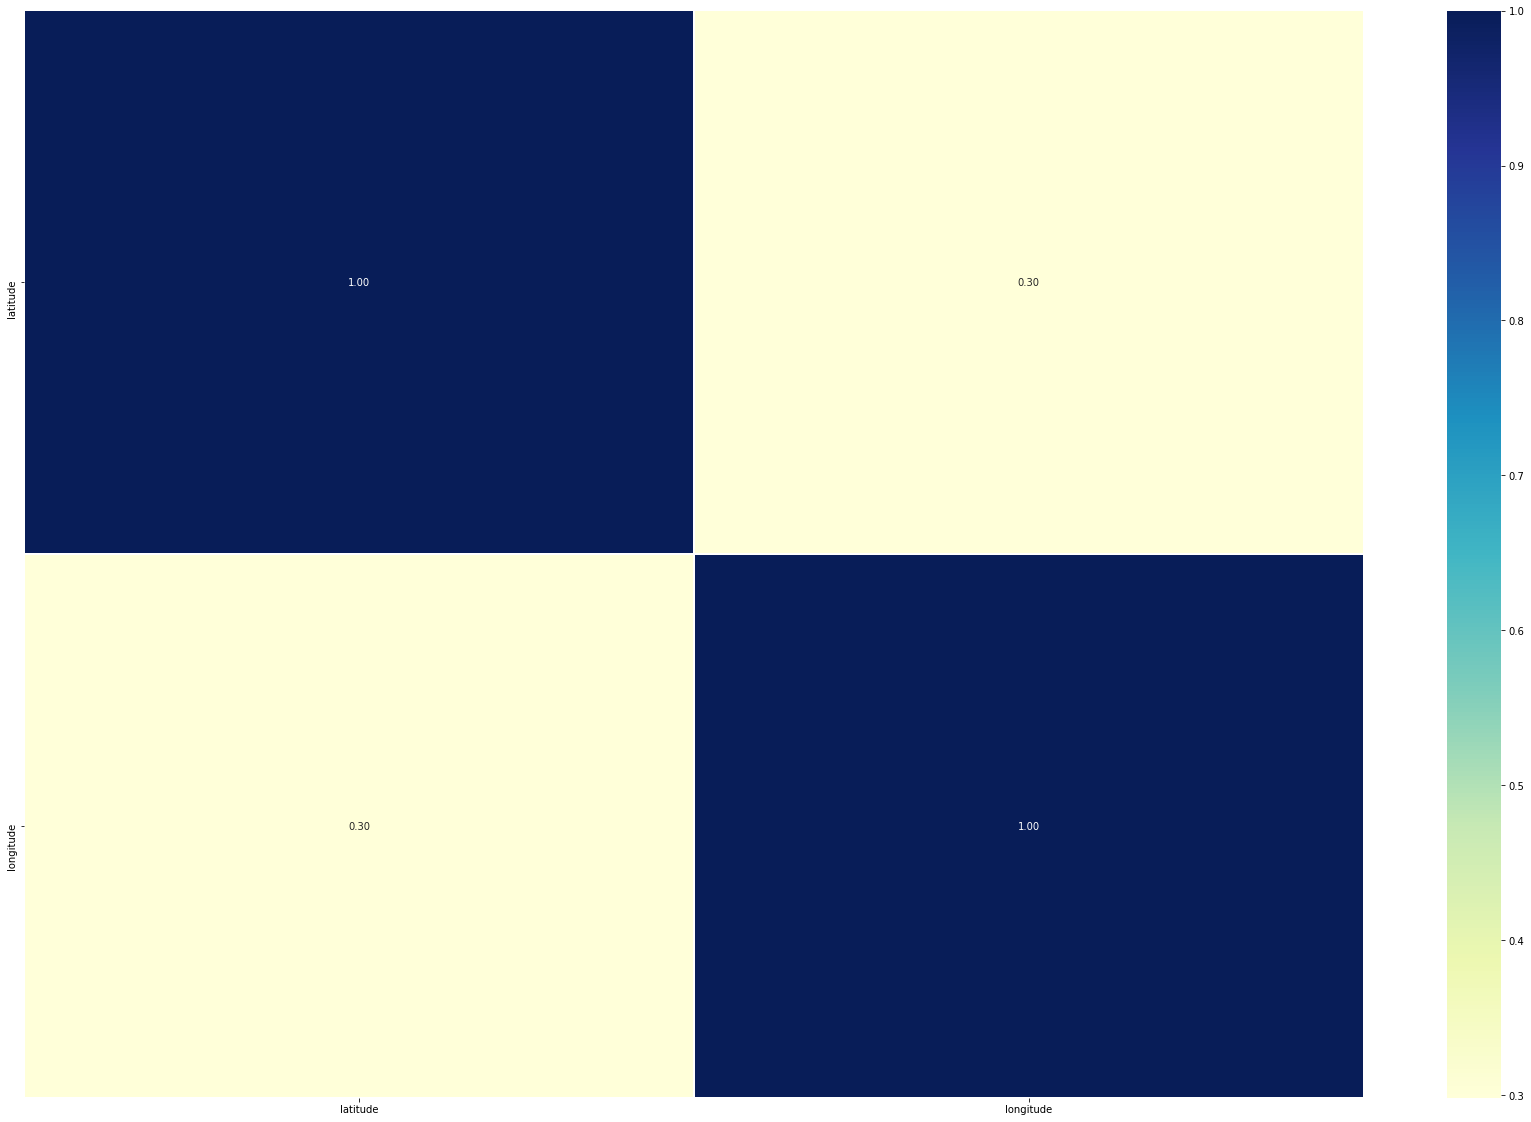

In [16]:
df_tmp = df.copy()
# Correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

 DATA PRE-PROCESSING

Creating a new target column i.e. Rain_or_Not column.

In [17]:
df['rain'] = df['rain'].apply(pd.to_numeric,errors='coerce')

In [18]:
df['Rain_Or_Not'] = np.where(df['rain'] > 0, 1, 0)

Droping latitue and longitute as they are not required 

In [19]:
df.drop(columns=['latitude','longitude'],inplace=True) 

In [20]:
df.head(10)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt,timestamp,day,month,year,hour,Rain_Or_Not
212016,Mayo,BELMULLET,0.0,7.6,7.1,6.5,9.7,93,1003,10,200,0,26000,16,8,00:00,01,jan,1990,00,0
212017,Mayo,BELMULLET,0.0,7.6,7.2,6.7,9.8,94,1003,10,190,0,19000,18,8,01:00,01,jan,1990,01,0
212018,Mayo,BELMULLET,0.0,7.8,7.2,6.5,9.7,91,1003.1,8,200,0,22000,18,7,02:00,01,jan,1990,02,0
212019,Mayo,BELMULLET,0.0,7.7,6.8,5.7,9.2,87,1003.4,12,220,0,26000,18,6,03:00,01,jan,1990,03,0
212020,Mayo,BELMULLET,0.5,7.5,6.5,5.3,8.9,86,1003.2,13,210,0,30000,999,3,04:00,01,jan,1990,04,1
212021,Mayo,BELMULLET,0.0,6.8,5.9,4.7,8.6,87,1003.9,9,220,0,30000,999,3,05:00,01,jan,1990,05,0
212022,Mayo,BELMULLET,0.0,5.8,4.9,3.7,7.9,86,1004.1,7,220,0,30000,999,3,06:00,01,jan,1990,06,0
212023,Mayo,BELMULLET,0.0,5.3,4.6,3.6,7.9,89,1004.7,8,220,0,30000,999,4,07:00,01,jan,1990,07,0
212024,Mayo,BELMULLET,0.0,6,5.4,4.6,8.5,91,1004.9,10,190,0,30000,999,2,08:00,01,jan,1990,08,0
212025,Mayo,BELMULLET,0.0,6.1,5.4,4.5,8.4,89,1005.4,12,200,0.1,20000,999,3,09:00,01,jan,1990,09,0


In [21]:
df['Rain_Or_Not'].value_counts()

0    1687131
1     388125
Name: Rain_Or_Not, dtype: int64

Visualization of the target column.

1=Rain
0=No rain

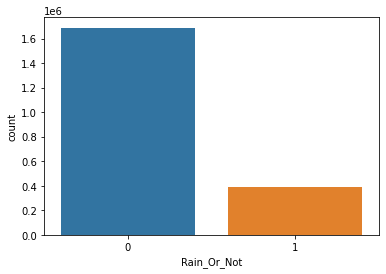

In [22]:
# visualize the target variable
sns.countplot(x='Rain_Or_Not', data=df)

Handling the imbalanced dataset using under-sampling.

In [23]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Rain_Or_Not==0]
df_minority = df[df.Rain_Or_Not==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=388125,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Rain_Or_Not.value_counts()


1    388125
0    388125
Name: Rain_Or_Not, dtype: int64

In [24]:
df_downsampled['Rain_Or_Not'].value_counts()

1    388125
0    388125
Name: Rain_Or_Not, dtype: int64

In [25]:
df_downsampled.head(10)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt,timestamp,day,month,year,hour,Rain_Or_Not
738335,Dublin,CASEMENT,0.0,12.7,11.4,10.1,12.4,85,999.3,11,220,0,30000,70,6,22:00,17,aug,2019,22,0
2218554,Mayo,KNOCK AIRPORT,0.0,7.3,6.2,4.8,8.6,84,1036.2,10,180,0.4,15000,220,7,15:00,02,mar,2011,15,0
2259599,Mayo,KNOCK AIRPORT,0.0,7.6,7.2,6.6,9.8,94,1009.1,7,170,0,,0,8,20:00,06,nov,2015,20,0
323243,Mayo,BELMULLET,0.0,17.2,14.3,12,14,71,1008,13,150,1,45000,999,3,11:00,09,sep,2002,11,0
450111,Mayo,BELMULLET,0.0,8.7,6.7,4.1,8.2,72,992.7,22,310,,,,,15:00,28,feb,2017,15,0
4132926,Clare,SHANNON AIRPORT,0.0,12.8,12.1,11.4,13.5,92,998.5,8,130,0,18000,90,7,00:00,29,sep,2006,00,0
4631470,Kerry,VALENTIA OBSERVATORY,0.0,8.1,4.7,-0.8,5.8,53,1024.5,6,80,,,,,16:00,10,feb,2017,16,0
1516568,Dublin,DUBLIN AIRPORT,0.0,7.3,4.9,1.5,6.7,66,993.8,10,210,0,25000,42,7,17:00,01,mar,2017,17,0
1393721,Dublin,DUBLIN AIRPORT,0.0,7.7,6.7,5.5,9,86,1013.4,15,120,0,9000,200,7,02:00,25,feb,2003,02,0
1114251,Cork,CORK AIRPORT,0.0,19.6,15.8,12.9,14.9,65,1022.3,23,300,1,50000,250,5,13:00,07,sep,2001,13,0


In [26]:
df_downsampled.isna().sum() / len(df)

county         0.000000
station        0.000000
rain           0.000017
temp           0.000000
wetb           0.000000
dewpt          0.000000
vappr          0.000000
rhum           0.000000
msl            0.000000
wdsp           0.000000
wddir          0.000000
sun            0.000000
vis            0.000000
clht           0.000000
clamt          0.000000
timestamp      0.000000
day            0.000000
month          0.000000
year           0.000000
hour           0.000000
Rain_Or_Not    0.000000
dtype: float64

In [27]:
df_downsampled.dropna(inplace=True)

In [28]:
df_downsampled.head(10)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt,timestamp,day,month,year,hour,Rain_Or_Not
738335,Dublin,CASEMENT,0.0,12.7,11.4,10.1,12.4,85,999.3,11,220,0,30000,70,6,22:00,17,aug,2019,22,0
2218554,Mayo,KNOCK AIRPORT,0.0,7.3,6.2,4.8,8.6,84,1036.2,10,180,0.4,15000,220,7,15:00,02,mar,2011,15,0
2259599,Mayo,KNOCK AIRPORT,0.0,7.6,7.2,6.6,9.8,94,1009.1,7,170,0,,0,8,20:00,06,nov,2015,20,0
323243,Mayo,BELMULLET,0.0,17.2,14.3,12,14,71,1008,13,150,1,45000,999,3,11:00,09,sep,2002,11,0
450111,Mayo,BELMULLET,0.0,8.7,6.7,4.1,8.2,72,992.7,22,310,,,,,15:00,28,feb,2017,15,0
4132926,Clare,SHANNON AIRPORT,0.0,12.8,12.1,11.4,13.5,92,998.5,8,130,0,18000,90,7,00:00,29,sep,2006,00,0
4631470,Kerry,VALENTIA OBSERVATORY,0.0,8.1,4.7,-0.8,5.8,53,1024.5,6,80,,,,,16:00,10,feb,2017,16,0
1516568,Dublin,DUBLIN AIRPORT,0.0,7.3,4.9,1.5,6.7,66,993.8,10,210,0,25000,42,7,17:00,01,mar,2017,17,0
1393721,Dublin,DUBLIN AIRPORT,0.0,7.7,6.7,5.5,9,86,1013.4,15,120,0,9000,200,7,02:00,25,feb,2003,02,0
1114251,Cork,CORK AIRPORT,0.0,19.6,15.8,12.9,14.9,65,1022.3,23,300,1,50000,250,5,13:00,07,sep,2001,13,0


In [29]:
df_downsampled.drop(columns=['sun','vis',	'clht',	'clamt'],inplace=True) 

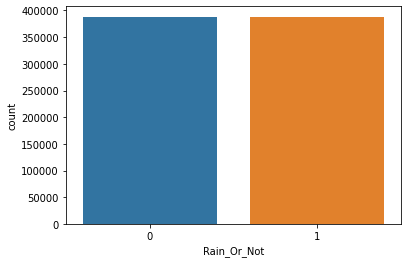

In [30]:
sns.countplot(x='Rain_Or_Not', data=df_downsampled)

In [31]:
df = df_downsampled.copy()


In [32]:
df.isna().sum() / len(df)

county         0.0
station        0.0
rain           0.0
temp           0.0
wetb           0.0
dewpt          0.0
vappr          0.0
rhum           0.0
msl            0.0
wdsp           0.0
wddir          0.0
timestamp      0.0
day            0.0
month          0.0
year           0.0
hour           0.0
Rain_Or_Not    0.0
dtype: float64

In [33]:
df.dropna(inplace=True)

In [34]:
df.head(10)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,timestamp,day,month,year,hour,Rain_Or_Not
738335,Dublin,CASEMENT,0.0,12.7,11.4,10.1,12.4,85,999.3,11,220,22:00,17,aug,2019,22,0
2218554,Mayo,KNOCK AIRPORT,0.0,7.3,6.2,4.8,8.6,84,1036.2,10,180,15:00,02,mar,2011,15,0
2259599,Mayo,KNOCK AIRPORT,0.0,7.6,7.2,6.6,9.8,94,1009.1,7,170,20:00,06,nov,2015,20,0
323243,Mayo,BELMULLET,0.0,17.2,14.3,12,14,71,1008,13,150,11:00,09,sep,2002,11,0
450111,Mayo,BELMULLET,0.0,8.7,6.7,4.1,8.2,72,992.7,22,310,15:00,28,feb,2017,15,0
4132926,Clare,SHANNON AIRPORT,0.0,12.8,12.1,11.4,13.5,92,998.5,8,130,00:00,29,sep,2006,00,0
4631470,Kerry,VALENTIA OBSERVATORY,0.0,8.1,4.7,-0.8,5.8,53,1024.5,6,80,16:00,10,feb,2017,16,0
1516568,Dublin,DUBLIN AIRPORT,0.0,7.3,4.9,1.5,6.7,66,993.8,10,210,17:00,01,mar,2017,17,0
1393721,Dublin,DUBLIN AIRPORT,0.0,7.7,6.7,5.5,9,86,1013.4,15,120,02:00,25,feb,2003,02,0
1114251,Cork,CORK AIRPORT,0.0,19.6,15.8,12.9,14.9,65,1022.3,23,300,13:00,07,sep,2001,13,0


In [35]:
df[["temp","wetb","dewpt","vappr","rhum","msl",	"wdsp",	"wddir",	"day", "year","hour"]] = df[["temp","wetb","dewpt","vappr","rhum","msl",	"wdsp",	"wddir",	"day", "year","hour"]].apply(pd.to_numeric,errors='coerce')

In [36]:
df.head()

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,timestamp,day,month,year,hour,Rain_Or_Not
738335,Dublin,CASEMENT,0.0,12.7,11.4,10.1,12.4,85.0,999.3,11.0,220.0,22:00,17,aug,2019,22,0
2218554,Mayo,KNOCK AIRPORT,0.0,7.3,6.2,4.8,8.6,84.0,1036.2,10.0,180.0,15:00,2,mar,2011,15,0
2259599,Mayo,KNOCK AIRPORT,0.0,7.6,7.2,6.6,9.8,94.0,1009.1,7.0,170.0,20:00,6,nov,2015,20,0
323243,Mayo,BELMULLET,0.0,17.2,14.3,12.0,14.0,71.0,1008.0,13.0,150.0,11:00,9,sep,2002,11,0
450111,Mayo,BELMULLET,0.0,8.7,6.7,4.1,8.2,72.0,992.7,22.0,310.0,15:00,28,feb,2017,15,0


In [37]:
df.dtypes

county          object
station         object
rain           float64
temp           float64
wetb           float64
dewpt          float64
vappr          float64
rhum           float64
msl            float64
wdsp           float64
wddir          float64
timestamp       object
day              int64
month           object
year             int64
hour             int64
Rain_Or_Not      int64
dtype: object

In [43]:
df.dropna(inplace=True)

# Predicting different models
We'll use:



1.   Logistic Regression
2.   KNearest Neighbors
3.   Decision Trees
4.    Random Forest
5.  Naive Bayes GNB
6.  XG Boost

In [44]:

from sklearn.model_selection import train_test_split

X = df[
        [ 
          
         	"temp",
         	"wetb",
         	"dewpt",
         	"vappr",
         	"rhum",
         	"msl",
         	"wdsp",
         	"wddir",
         	"day",
         	"year",
         	"hour",
         
        ]
]

y = df['Rain_Or_Not']



We must to do train_test_split for split our data on X and Y.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.35)

In [46]:
print(X_train)

         temp  wetb  dewpt  vappr   rhum     msl  wdsp  wddir  day  year  hour
472595   13.6  12.8   12.1   14.1   90.0   996.9  11.0  140.0   23  2019    11
2171855  11.5  11.5   11.5   13.6  100.0   986.3  11.0  140.0    2  2005    20
4516277   5.5   2.9   -1.6    5.4   60.0  1034.7  12.0   10.0   21  2003    22
4170599  12.1  11.4   10.7   12.9   92.0   999.1  16.0  190.0   15  2011    17
1457479  20.8  16.5   13.4   15.3   62.0  1017.3  11.0  130.0    4  2010    16
...       ...   ...    ...    ...    ...     ...   ...    ...  ...   ...   ...
1215235   0.8   0.7    0.6    6.3   98.0   990.6   6.0   90.0   16  2013     5
215128   12.1   9.8    7.3   10.3   73.0  1015.5   9.0  250.0   10  1990    16
1066945  10.9  10.9   10.9   13.0  100.0  1018.5  11.0  190.0   15  1996    11
4003869   5.3   4.6    3.6    7.9   89.0   996.5  12.0  360.0    8  1992    15
2643473  15.5  12.8   10.5   12.7   72.0  1022.1  11.0   80.0    5  2013    13

[504392 rows x 11 columns]


In [47]:
print(X_test)

         temp  wetb  dewpt  vappr  rhum     msl  wdsp  wddir  day  year  hour
404257    5.8   4.8    3.4    7.8  85.0  1001.1  26.0  270.0    7  2011     1
1038426   6.4   6.1    5.7    9.2  95.0  1001.8  15.0  210.0   13  1993     4
378700   -1.1  -1.4   -2.0    5.3  94.0  1028.6   1.0  130.0    6  2009     4
4632278   8.8   8.4    8.0   10.7  94.0  1022.3   9.0  200.0   16  2017     8
4083309   9.5   8.3    7.0   10.0  84.0  1017.8  10.0  280.0   30  2001    15
...       ...   ...    ...    ...   ...     ...   ...    ...  ...   ...   ...
4569689   3.7   3.3    2.7    7.4  93.0  1026.9   1.0  280.0   24  2010    10
2118499   9.1   7.1    4.6    8.5  73.0   992.4  14.0  310.0    2  1999    16
1192634  16.7  11.9    7.2   10.1  53.0  1014.1  14.0  310.0   17  2010    12
2462591   8.1   6.5    4.4    8.4  78.0  1007.9  26.0  360.0   16  1992    19
4399132  17.1  16.4   15.9   18.1  93.0  1017.8  13.0  210.0   10  1990    21

[271596 rows x 11 columns]


Perfomed rainfall prediction using Logistic regression model.

In [48]:
# Logistic Regression
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
print(accuracy_score(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

0.7555523645414512
              precision    recall  f1-score   support

           0       0.77      0.73      0.75    135520
           1       0.74      0.78      0.76    136076

    accuracy                           0.76    271596
   macro avg       0.76      0.76      0.76    271596
weighted avg       0.76      0.76      0.76    271596



Prediction using KNN algorithm.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print(accuracy_score(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

0.7583727300843901
              precision    recall  f1-score   support

           0       0.77      0.73      0.75    135520
           1       0.74      0.79      0.77    136076

    accuracy                           0.76    271596
   macro avg       0.76      0.76      0.76    271596
weighted avg       0.76      0.76      0.76    271596



Prediction using decision tree classifier.

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
print(accuracy_score(y_test, tree_predict))
print(classification_report(y_test, tree_predict))

0.7087990986612469
              precision    recall  f1-score   support

           0       0.71      0.71      0.71    135520
           1       0.71      0.71      0.71    136076

    accuracy                           0.71    271596
   macro avg       0.71      0.71      0.71    271596
weighted avg       0.71      0.71      0.71    271596



Prediction using Random forest classifier.

In [49]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
print(accuracy_score(y_test, forest_predict))
print(classification_report(y_test, forest_predict))

0.7905491980736093
              precision    recall  f1-score   support

           0       0.81      0.76      0.78    135520
           1       0.78      0.82      0.80    136076

    accuracy                           0.79    271596
   macro avg       0.79      0.79      0.79    271596
weighted avg       0.79      0.79      0.79    271596



Prediction using naive bayes.

In [52]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_predict = bayes.predict(X_test)
print(accuracy_score(y_test, bayes_predict))
print(classification_report(y_test, bayes_predict))

0.73651673809629
              precision    recall  f1-score   support

           0       0.77      0.68      0.72    135520
           1       0.71      0.80      0.75    136076

    accuracy                           0.74    271596
   macro avg       0.74      0.74      0.74    271596
weighted avg       0.74      0.74      0.74    271596



Prediction using XGBoost

In [53]:
# XGBoost

import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
print(accuracy_score(y_test, xgb_predict))
print(classification_report(y_test, xgb_predict))

0.7748530906198913
              precision    recall  f1-score   support

           0       0.79      0.74      0.77    135520
           1       0.76      0.81      0.78    136076

    accuracy                           0.77    271596
   macro avg       0.78      0.77      0.77    271596
weighted avg       0.78      0.77      0.77    271596



In [54]:
models_default_scores = {
    'Logistic Regression' : lr.score(X_test, y_test),
    'KNearest Neighbors' : knn.score(X_test, y_test),
    'Decision Tree' : tree.score(X_test, y_test),
    'Random Forest Classifier' : forest.score(X_test, y_test),
    'Naive Bayes GNB' : bayes.score(X_test, y_test),
    'XGBoost' : xgb.score(X_test, y_test)
}

In [55]:
models_default_scores

{'Decision Tree': 0.7087990986612469,
 'KNearest Neighbors': 0.7583727300843901,
 'Logistic Regression': 0.7555523645414512,
 'Naive Bayes GNB': 0.73651673809629,
 'Random Forest Classifier': 0.7905491980736093,
 'XGBoost': 0.7748530906198913}

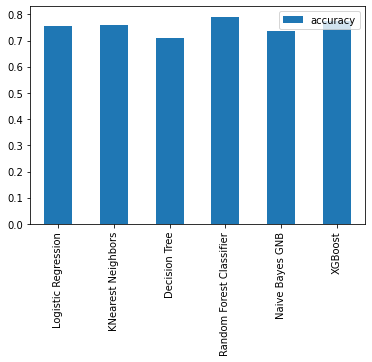

In [56]:
default_models_compare = pd.DataFrame(models_default_scores, index=['accuracy'])
default_models_compare.T.plot.bar()

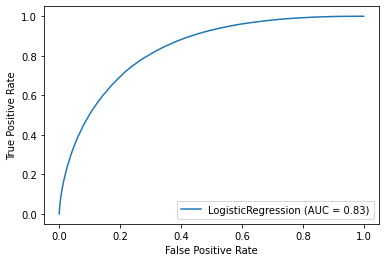

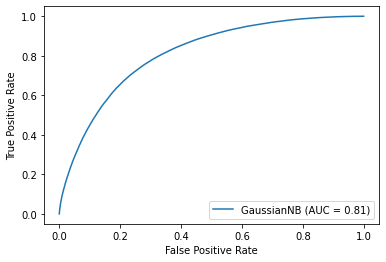

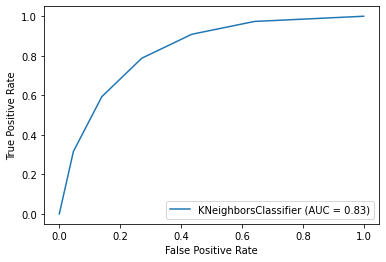

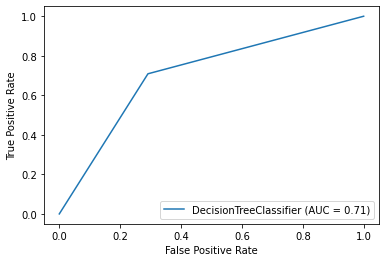

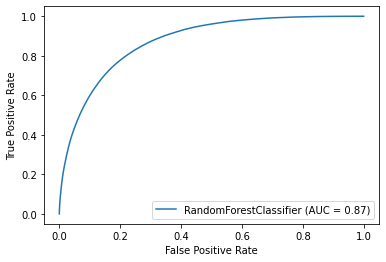

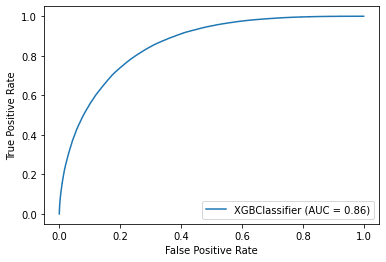

In [57]:

from sklearn import metrics

metrics.plot_roc_curve(lr, X_test, y_test)
metrics.plot_roc_curve(bayes, X_test, y_test)
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.plot_roc_curve(tree, X_test, y_test)
metrics.plot_roc_curve(forest, X_test, y_test)
metrics.plot_roc_curve(xgb, X_test, y_test)


Hyperparameter tuning with RandomizedSearchCV

In [58]:


# Random Forest Classifier Grid
forest_grid = {'n_estimators' : np.arange(10,600,10),
               'max_depth' : np.arange(1,12,1),
               'min_samples_leaf' : np.arange(2,14,2),
               'min_samples_split' : np.arange(2,14,2)}



In [61]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(7)

forest_cv = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                      max_samples=10000),
                               param_distributions=forest_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

forest_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 27.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=10000,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [62]:
forest_cv.best_params_

{'max_depth': 11,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 390}

In [63]:
forest_cv.score(X_test, y_test)

0.7763221844209782